# Laptop Price Prediction

## Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (`buynow_price` column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the `RMSE` measure.

## Data Description
The dataset has already been randomly divided into the training, validation and test sets. It is stored in 3 files: `train_dataset.json, val_dataset.json and test_dataset.json` respectively. Each file is JSON saved in `orient=’columns’` format.

Example how to load the data:

```python
import pandas as pd
dataset = pd.read_json("public-dataset.json")
dataset.columns
Index(['buynow_price', 'graphic card type', 'communications', 'resolution (px)', 'CPU cores', 'RAM size', 'operating system', 'drive type', 'input devices', 'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state', 'drive memory size (GB)', 'warranty', 'screen size'], dtype='object')
```

# Solution

## Data Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_json("datasets/train_dataset.json",orient = 'column')
test_df = pd.read_json("datasets/test_dataset.json",orient = 'column')
val_df = pd.read_json("datasets/val_dataset.json", orient = 'column')

In [3]:
df = pd.concat([train_df,test_df,val_df],axis = 0)
df.head()

graphic card type                               communications  \
7233    dedicated graphics            [bluetooth, lan 10/100/1000 mbps]   
5845    dedicated graphics          [wi-fi, bluetooth, lan 10/100 mbps]   
10303                 None  [bluetooth, nfc (near field communication)]   
10423                 None                                         None   
5897   integrated graphics                           [wi-fi, bluetooth]   

      resolution (px) CPU cores RAM size   operating system drive type  \
7233      1920 x 1080         4    32 gb        [no system]  ssd + hdd   
5845       1366 x 768         4     8 gb  [windows 10 home]        ssd   
10303     1920 x 1080         2     8 gb  [windows 10 home]        hdd   
10423            None         2     None               None       None   
5897      2560 x 1440         4     8 gb  [windows 10 home]        ssd   

                                           input devices  \
7233   [keyboard, touchpad, illuminated keyboard, num...   
5845              [keyboard, touchpad, numeric keyboard]   
10303                                               None   
10423                                               None   
5897          [keyboard, touchpad, illuminated keyboard]   

                                           multimedia RAM type  \
7233   [SD card reader, camera, speakers, microphone]     ddr4   
5845   [SD card reader, camera, speakers, microphone]     ddr3   
10303                                [SD card reader]     ddr4   
10423                                            None     None   
5897   [SD card reader, camera, speakers, microphone]     ddr4   

       CPU clock speed (GHz)      CPU model state  drive memory size (GB)  \
7233                     2.6  intel core i7   new                  1250.0   
5845                     2.4  intel core i7   new                   256.0   
10303                    1.6  intel core i7   new                  1000.0   
10423                    NaN           None   new                     NaN   
5897                     1.2      other CPU   new                   256.0   

                warranty  screen size  buynow_price  
7233   producer warranty  17" - 17.9"        4999.0  
5845     seller warranty  15" - 15.9"        2649.0  
10303  producer warranty  15" - 15.9"        3399.0  
10423  producer warranty         None        1599.0  
5897   producer warranty  12" - 12.9"        4499.0

In [4]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 7233 to 4277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null

In [6]:
df.describe

<bound method NDFrame.describe of          graphic card type                                     communications  \
7233    dedicated graphics                  [bluetooth, lan 10/100/1000 mbps]   
5845    dedicated graphics                [wi-fi, bluetooth, lan 10/100 mbps]   
10303                 None        [bluetooth, nfc (near field communication)]   
10423                 None                                               None   
5897   integrated graphics                                 [wi-fi, bluetooth]   
...                    ...                                                ...   
4433    dedicated graphics  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
9242                  None                                               None   
3982    dedicated graphics                       [bluetooth, lan 10/100 mbps]   
9673    dedicated graphics  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
4277    dedicated graphics                       [bluetooth, lan 10/100 mbp

In [7]:
df.shape

(7853, 17)

## Data Exploration & Preprocessing

In [8]:
x = df.columns.to_list()
type(x)


list

In [9]:
for y in range(0,17):
    print(type(df[x[y]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
for c in x:
    if type(df[c][0]) != list:
        print( f"uniue value {c} :    {df[c].unique()}")
        print("\n.....................................................\n")

uniue value graphic card type :    ['dedicated graphics' None 'integrated graphics']

.....................................................

uniue value resolution (px) :    ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']

.....................................................

uniue value CPU cores :    ['4' '2' 'not applicable' '3' '1' '8' '6']

.....................................................

uniue value RAM size :    ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '24 gb' '256 mb']

.....................................................

uniue value drive type :    ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']

.....................................................

uniue value RAM type :    ['ddr4' 'ddr3' None 'ddr3l']

.....................................................

uniue value CPU clock speed (GHz) :    [2.6  

In [11]:
df[x[3]].unique()

array(['4', '2', 'not applicable', '3', '1', '8', '6'], dtype=object)

In [12]:
df.columns.to_list()

['graphic card type',
 'communications',
 'resolution (px)',
 'CPU cores',
 'RAM size',
 'operating system',
 'drive type',
 'input devices',
 'multimedia',
 'RAM type',
 'CPU clock speed (GHz)',
 'CPU model',
 'state',
 'drive memory size (GB)',
 'warranty',
 'screen size',
 'buynow_price']

##### dataframe convertion and unique value

In [13]:
df = df.drop(columns = 'state')
## The dropna() method removes the rows that contains NULL values.
df = df.dropna()
df.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

### compact df creation

In [14]:
compact_cols = ['communications', 'input devices', 'multimedia']

In [15]:
df[compact_cols] 

communications  \
7233                  [bluetooth, lan 10/100/1000 mbps]   
5845                [wi-fi, bluetooth, lan 10/100 mbps]   
5897                                 [wi-fi, bluetooth]   
4870                [wi-fi, bluetooth, lan 10/100 mbps]   
2498           [wi-fi, bluetooth, lan 10/100/1000 mbps]   
...                                                 ...   
5429           [wi-fi, bluetooth, lan 10/100/1000 mbps]   
4433  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
3982                       [bluetooth, lan 10/100 mbps]   
9673  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
4277                       [bluetooth, lan 10/100 mbps]   

                                          input devices  \
7233  [keyboard, touchpad, illuminated keyboard, num...   
5845             [keyboard, touchpad, numeric keyboard]   
5897         [keyboard, touchpad, illuminated keyboard]   
4870             [keyboard, touchpad, numeric keyboard]   
2498  [keyboard, touchpad, illuminated keyboard, num...   
...                                                 ...   
5429             [keyboard, touchpad, numeric keyboard]   
4433                               [keyboard, touchpad]   
3982                               [keyboard, touchpad]   
9673         [keyboard, touchpad, illuminated keyboard]   
4277         [keyboard, touchpad, illuminated keyboard]   

                                          multimedia  
7233  [SD card reader, camera, speakers, microphone]  
5845  [SD card reader, camera, speakers, microphone]  
5897  [SD card reader, camera, speakers, microphone]  
4870  [SD card reader, camera, speakers, microphone]  
2498  [SD card reader, camera, speakers, microphone]  
...                                              ...  
5429  [SD card reader, camera, speakers, microphone]  
4433                  [camera, speakers, microphone]  
3982  [SD card reader, camera, speakers, microphone]  
9673  [SD card reader, camera, speakers, microphone]  
4277  [SD card reader, camera, speakers, microphone]  

[6109 rows x 3 columns]

In [16]:
pd.DataFrame(df['input devices'].to_list()).sample(20)

0         1                     2                 3
2945  keyboard  touchpad                  None              None
241   keyboard  touchpad  illuminated keyboard              None
5624  keyboard  touchpad      numeric keyboard              None
1395  keyboard  touchpad      numeric keyboard              None
753   keyboard  touchpad                  None              None
4085  keyboard  touchpad                  None              None
2248  keyboard  touchpad                  None              None
3353  touchpad      None                  None              None
2094  keyboard  touchpad  illuminated keyboard  numeric keyboard
4094  keyboard  touchpad                  None              None
227   keyboard  touchpad                  None              None
5114  keyboard  touchpad                  None              None
2770  keyboard  touchpad      numeric keyboard              None
5515  keyboard  touchpad  illuminated keyboard              None
1500  keyboard  touchpad      numeric keyboard              None
2299  keyboard  touchpad  illuminated keyboard              None
4192  keyboard  touchpad  illuminated keyboard  numeric keyboard
4993  keyboard  touchpad  illuminated keyboard  numeric keyboard
2460  keyboard  touchpad                  None              None
4274  touchpad      None                  None              None

In [17]:
col_df = pd.DataFrame(df['input devices'].to_list())

In [18]:
col_df.columns.to_list()

[0, 1, 2, 3]

In [19]:
for col in col_df.columns.to_list():
    print(col)
    print(col_df[col].unique())

0
['keyboard' 'touchpad' 'illuminated keyboard']
1
['touchpad' None 'numeric keyboard' 'illuminated keyboard']
2
['illuminated keyboard' 'numeric keyboard' None]
3
['numeric keyboard' None]


In [20]:
unique_vals = []
for col in col_df.columns.to_list():
    for val in list(col_df[col].unique()):
        if(val is not None and val not in unique_vals):
            unique_vals.append(val)
unique_vals

['keyboard', 'touchpad', 'illuminated keyboard', 'numeric keyboard']

In [21]:
def get_unique_val(col_name):
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        for val in list(col_df[col].unique()):
            if(val is not None  and val not in unique_vals ):
                unique_vals.append(val)
    return unique_vals

In [22]:
print(get_unique_val('input devices'))
print(get_unique_val('multimedia'))

['keyboard', 'touchpad', 'illuminated keyboard', 'numeric keyboard']
['SD card reader', 'camera', 'microphone', 'speakers']


In [23]:
compact_cols = ['communications', 'input devices', 'multimedia']

In [24]:
compact_cols

['communications', 'input devices', 'multimedia']

In [25]:
compact_dict = {"communications":get_unique_val('communications'),
               "input devices":get_unique_val('input devices'),
               "multimedia":get_unique_val('multimedia')}

In [26]:
compact_dict['communications']

['bluetooth',
 'wi-fi',
 'wi-fi 802.11 b/g/n/ac',
 'lan 10/100 mbps',
 'wi-fi 802.11 a/b/g/n/ac',
 'nfc (near field communication)',
 'lan 10/100/1000 mbps',
 'gps',
 'wi-fi 802.11 b/g/n',
 'intel wireless display (widi)',
 'wi-fi 802.11 a/b/g/n',
 'modem 3g (wwan)',
 'modem 4g (lte)']

In [27]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df   

bluetooth  wi-fi  wi-fi 802.11 b/g/n/ac  lan 10/100 mbps  \
7233        0.0    0.0                    0.0              0.0   
5845        0.0    0.0                    0.0              0.0   
5897        0.0    0.0                    0.0              0.0   
4870        0.0    0.0                    0.0              0.0   
2498        0.0    0.0                    0.0              0.0   
...         ...    ...                    ...              ...   
5429        0.0    0.0                    0.0              0.0   
4433        0.0    0.0                    0.0              0.0   
3982        0.0    0.0                    0.0              0.0   
9673        0.0    0.0                    0.0              0.0   
4277        0.0    0.0                    0.0              0.0   

      wi-fi 802.11 a/b/g/n/ac  nfc (near field communication)  \
7233                      0.0                             0.0   
5845                      0.0                             0.0   
5897                      0.0                             0.0   
4870                      0.0                             0.0   
2498                      0.0                             0.0   
...                       ...                             ...   
5429                      0.0                             0.0   
4433                      0.0                             0.0   
3982                      0.0                             0.0   
9673                      0.0                             0.0   
4277                      0.0                             0.0   

      lan 10/100/1000 mbps  gps  wi-fi 802.11 b/g/n  \
7233                   0.0  0.0                 0.0   
5845                   0.0  0.0                 0.0   
5897                   0.0  0.0                 0.0   
4870                   0.0  0.0                 0.0   
2498                   0.0  0.0                 0.0   
...                    ...  ...                 ...   
5429                   0.0  0.0                 0.0   
4433                   0.0  0.0                 0.0   
3982                   0.0  0.0                 0.0   
9673                   0.0  0.0                 0.0   
4277                   0.0  0.0                 0.0   

      intel wireless display (widi)  ...  modem 3g (wwan)  modem 4g (lte)  \
7233                            0.0  ...              0.0             0.0   
5845                            0.0  ...              0.0             0.0   
5897                            0.0  ...              0.0             0.0   
4870                            0.0  ...              0.0             0.0   
2498                            0.0  ...              0.0             0.0   
...                             ...  ...              ...             ...   
5429                            0.0  ...              0.0             0.0   
4433                            0.0  ...              0.0             0.0   
3982                            0.0  ...              0.0             0.0   
9673                            0.0  ...              0.0             0.0   
4277                            0.0  ...              0.0             0.0   

      keyboard  touchpad  illuminated keyboard  numeric keyboard  \
7233       0.0       0.0                   0.0               0.0   
5845       0.0       0.0                   0.0               0.0   
5897       0.0       0.0                   0.0               0.0   
4870       0.0       0.0                   0.0               0.0   
2498       0.0       0.0                   0.0               0.0   
...        ...       ...                   ...               ...   
5429       0.0       0.0                   0.0               0.0   
4433       0.0       0.0                   0.0               0.0   
3982       0.0       0.0                   0.0               0.0   
9673       0.0       0.0                   0.0               0.0   
4277       0.0       0.0                   0.0               0.0   

      SD card reader  camera 

In [28]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

bluetooth  wi-fi  wi-fi 802.11 b/g/n/ac  lan 10/100 mbps  \
7233          1      0                      0                0   
5845          1      1                      0                1   
5897          1      1                      0                0   
4870          1      1                      0                1   
2498          1      1                      0                0   
...         ...    ...                    ...              ...   
5429          1      1                      0                0   
4433          1      0                      0                1   
3982          1      0                      0                1   
9673          1      0                      0                1   
4277          1      0                      0                1   

      wi-fi 802.11 a/b/g/n/ac  nfc (near field communication)  \
7233                        0                               0   
5845                        0                               0   
5897                        0                               0   
4870                        0                               0   
2498                        0                               0   
...                       ...                             ...   
5429                        0                               0   
4433                        0                               1   
3982                        0                               0   
9673                        0                               1   
4277                        0                               0   

      lan 10/100/1000 mbps  gps  wi-fi 802.11 b/g/n  \
7233                     1    0                   0   
5845                     0    0                   0   
5897                     0    0                   0   
4870                     0    0                   0   
2498                     1    0                   0   
...                    ...  ...                 ...   
5429                     1    0                   0   
4433                     1    0                   0   
3982                     0    0                   0   
9673                     1    0                   0   
4277                     0    0                   0   

      intel wireless display (widi)  ...  modem 3g (wwan)  modem 4g (lte)  \
7233                              0  ...                0               0   
5845                              0  ...                0               0   
5897                              0  ...                0               0   
4870                              0  ...                0               0   
2498                              0  ...                0               0   
...                             ...  ...              ...             ...   
5429                              0  ...                0               0   
4433                              1  ...                1               0   
3982                              0  ...                0               0   
9673                              1  ...                1               0   
4277                              0  ...                0               0   

      keyboard  touchpad  illuminated keyboard  numeric keyboard  \
7233         1         1                     1                 1   
5845         1         1                     0                 1   
5897         1         1                     1                 0   
4870         1         1                     0                 1   
2498         1         1                     1                 1   
...        ...       ...                   ...               ...   
5429         1         1                     0                 1   
4433         1         1                     0                 0   
3982         1         1                     0                 0   
9673         1         1                     1                 0   
4277         1         1                     1                 0   

      SD card reader  camera 

### replace & split in specific columns

In [29]:
df['RAM size'] =  df['RAM size'].replace(' gb','',regex = True).astype('int32')

In [30]:

type(df['RAM size'][0])

numpy.int32

In [31]:
df['screen size'] =  df['screen size'].apply(lambda x:x.split('"')[0])

In [32]:
df['screen size']

7233    17
5845    15
5897    12
4870    15
2498    17
        ..
5429    15
4433    15
3982    15
9673    15
4277    15
Name: screen size, Length: 6109, dtype: object

In [33]:
df.head(1)


graphic card type                     communications resolution (px)  \
7233  dedicated graphics  [bluetooth, lan 10/100/1000 mbps]     1920 x 1080   

     CPU cores  RAM size operating system drive type  \
7233         4        32      [no system]  ssd + hdd   

                                          input devices  \
7233  [keyboard, touchpad, illuminated keyboard, num...   

                                          multimedia RAM type  \
7233  [SD card reader, camera, speakers, microphone]     ddr4   

      CPU clock speed (GHz)      CPU model  drive memory size (GB)  \
7233                    2.6  intel core i7                  1250.0   

               warranty screen size  buynow_price  
7233  producer warranty          17        4999.0

In [34]:
df["x_resolution"] =  df["resolution (px)"].apply(lambda x:x.split(" x ")[0])
df["y_resolution"] =  df["resolution (px)"].apply(lambda x:x.split(" x ")[1])
df.drop(columns = 'resolution (px)',inplace = True)

In [35]:
df.head(2)

graphic card type                       communications CPU cores  \
7233  dedicated graphics    [bluetooth, lan 10/100/1000 mbps]         4   
5845  dedicated graphics  [wi-fi, bluetooth, lan 10/100 mbps]         4   

      RAM size   operating system drive type  \
7233        32        [no system]  ssd + hdd   
5845         8  [windows 10 home]        ssd   

                                          input devices  \
7233  [keyboard, touchpad, illuminated keyboard, num...   
5845             [keyboard, touchpad, numeric keyboard]   

                                          multimedia RAM type  \
7233  [SD card reader, camera, speakers, microphone]     ddr4   
5845  [SD card reader, camera, speakers, microphone]     ddr3   

      CPU clock speed (GHz)      CPU model  drive memory size (GB)  \
7233                    2.6  intel core i7                  1250.0   
5845                    2.4  intel core i7                   256.0   

               warranty screen size  buynow_price x_resolution y_resolution  
7233  producer warranty          17        4999.0         1920         1080  
5845    seller warranty          15        2649.0         1366          768

### numerical columns

In [36]:
numerical_cols = [ 'CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)',
                     'screen size', 'x_resolution', 'y_resolution']
numerical_df = df[numerical_cols].astype(float)

In [37]:
numerical_df.head(2)

CPU cores  RAM size  CPU clock speed (GHz)  drive memory size (GB)  \
7233        4.0      32.0                    2.6                  1250.0   
5845        4.0       8.0                    2.4                   256.0   

      screen size  x_resolution  y_resolution  
7233         17.0        1920.0        1080.0  
5845         15.0        1366.0         768.0

### one hot encoding

In [38]:
#dummies_df = df['operating system'].str.join('|').str.get_dummies()

In [39]:
df['operating system'].to_list()

[['no system'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 8.1 home 64-bit', 'other'],
 ['no system'],
 ['windows 10 professional'],
 ['windows 10 professional'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['no system'],
 ['windows 7 professional 64-bit'],
 ['windows 7 professional 64-bit', 'windows 10 professional'],
 ['no system'],
 ['no system'],
 ['windows 10 home'],
 ['windows 10 home', 'other'],
 ['windows 10 home'],
 ['no system'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 10 professional'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['no system'],
 ['no system'],
 ['windows 8.1 home 64-bit'],
 ['windows 10 professional'],
 ['windows 10 professional'],
 ['windows 10 home', 'other'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 8.1 home 32-bit', 'other'],
 ['windows 10 home'],
 ['windows 10 home'],
 ['windows 7 professional 64-bit'],
 ['windows 10 home'],

In [40]:
df['operating system'] = df['operating system'].str.join('|').to_list()

In [41]:
df['operating system'].str.get_dummies()

no system  other  windows 10 home  windows 10 professional  \
7233          1      0                0                        0   
5845          0      0                1                        0   
5897          0      0                1                        0   
4870          0      0                1                        0   
2498          0      1                0                        0   
...         ...    ...              ...                      ...   
5429          0      0                0                        0   
4433          1      0                0                        0   
3982          1      0                0                        0   
9673          0      0                1                        0   
4277          0      0                1                        0   

      windows 7 home 64-bit  windows 7 professional 32-bit  \
7233                      0                              0   
5845                      0                              0   
5897                      0                              0   
4870                      0                              0   
2498                      0                              0   
...                     ...                            ...   
5429                      0                              0   
4433                      0                              0   
3982                      0                              0   
9673                      0                              0   
4277                      0                              0   

      windows 7 professional 64-bit  windows 8.1 home 32-bit  \
7233                              0                        0   
5845                              0                        0   
5897                              0                        0   
4870                              0                        0   
2498                              0                        0   
...                             ...                      ...   
5429                              0                        0   
4433                              0                        0   
3982                              0                        0   
9673                              0                        0   
4277                              0                        0   

      windows 8.1 home 64-bit  windows 8.1 professional 32-bit  \
7233                        0                                0   
5845                        0                                0   
5897                        0                                0   
4870                        0                                0   
2498                        1                                0   
...                       ...                              ...   
5429                        1                                0   
4433                        0                                0   
3982                        0                                0   
9673                        0                                0   
4277                        0                                0   

      windows 8.1 professional 64-bit  
7233                                0  
5845                                0  
5897                                0  
4870                                0  
2498                                0  
...                               ...  
5429                                0  
4433                                0  
3982                                0  
9673                                0  
4277                                0  

[6109 rows x 11 columns]

### dummies df creation 

In [42]:
dummies_df = df['operating system'].str.get_dummies()

In [43]:
dummies_df

no system  other  windows 10 home  windows 10 professional  \
7233          1      0                0                        0   
5845          0      0                1                        0   
5897          0      0                1                        0   
4870          0      0                1                        0   
2498          0      1                0                        0   
...         ...    ...              ...                      ...   
5429          0      0                0                        0   
4433          1      0                0                        0   
3982          1      0                0                        0   
9673          0      0                1                        0   
4277          0      0                1                        0   

      windows 7 home 64-bit  windows 7 professional 32-bit  \
7233                      0                              0   
5845                      0                              0   
5897                      0                              0   
4870                      0                              0   
2498                      0                              0   
...                     ...                            ...   
5429                      0                              0   
4433                      0                              0   
3982                      0                              0   
9673                      0                              0   
4277                      0                              0   

      windows 7 professional 64-bit  windows 8.1 home 32-bit  \
7233                              0                        0   
5845                              0                        0   
5897                              0                        0   
4870                              0                        0   
2498                              0                        0   
...                             ...                      ...   
5429                              0                        0   
4433                              0                        0   
3982                              0                        0   
9673                              0                        0   
4277                              0                        0   

      windows 8.1 home 64-bit  windows 8.1 professional 32-bit  \
7233                        0                                0   
5845                        0                                0   
5897                        0                                0   
4870                        0                                0   
2498                        1                                0   
...                       ...                              ...   
5429                        1                                0   
4433                        0                                0   
3982                        0                                0   
9673                        0                                0   
4277                        0                                0   

      windows 8.1 professional 64-bit  
7233                                0  
5845                                0  
5897                                0  
4870                                0  
2498                                0  
...                               ...  
5429                                0  
4433                                0  
3982                                0  
9673                                0  
4277                                0  

[6109 rows x 11 columns]

In [44]:
dummy_cols = ['drive type','RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df,col_dummies_df],axis = 1)

In [45]:
dummies_df

no system  other  windows 10 home  windows 10 professional  \
7233          1      0                0                        0   
5845          0      0                1                        0   
5897          0      0                1                        0   
4870          0      0                1                        0   
2498          0      1                0                        0   
...         ...    ...              ...                      ...   
5429          0      0                0                        0   
4433          1      0                0                        0   
3982          1      0                0                        0   
9673          0      0                1                        0   
4277          0      0                1                        0   

      windows 7 home 64-bit  windows 7 professional 32-bit  \
7233                      0                              0   
5845                      0                              0   
5897                      0                              0   
4870                      0                              0   
2498                      0                              0   
...                     ...                            ...   
5429                      0                              0   
4433                      0                              0   
3982                      0                              0   
9673                      0                              0   
4277                      0                              0   

      windows 7 professional 64-bit  windows 8.1 home 32-bit  \
7233                              0                        0   
5845                              0                        0   
5897                              0                        0   
4870                              0                        0   
2498                              0                        0   
...                             ...                      ...   
5429                              0                        0   
4433                              0                        0   
3982                              0                        0   
9673                              0                        0   
4277                              0                        0   

      windows 8.1 home 64-bit  windows 8.1 professional 32-bit  ...  \
7233                        0                                0  ...   
5845                        0                                0  ...   
5897                        0                                0  ...   
4870                        0                                0  ...   
2498                        1                                0  ...   
...                       ...                              ...  ...   
5429                        1                                0  ...   
4433                        0                                0  ...   
3982                        0                                0  ...   
9673                        0                                0  ...   
4277                        0                                0  ...   

      intel celeron dual-core  intel celeron m  intel celeron quad core   \
7233                        0                0                         0   
5845                        0                0                         0   
5897                        0                0                         0   
4870                        0                0                         0   
2498                        0                0                         0   
...                       ...              ...                       ...   
5429                        0                0                         0   
4433                        0                0                         0   
3982                        0                0                         0   
9673                        0                0                

### categorical columns

In [46]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = list()
for col in df.columns.to_list():
    if col not in compact_cols + label_col + numerical_cols +['operating system'] + dummy_cols:
        categorical_columns.append(col)

In [47]:
categorical_columns 

['graphic card type', 'warranty']

In [48]:
df[categorical_columns]

graphic card type           warranty
7233   dedicated graphics  producer warranty
5845   dedicated graphics    seller warranty
5897  integrated graphics  producer warranty
4870  integrated graphics  producer warranty
2498   dedicated graphics  producer warranty
...                   ...                ...
5429   dedicated graphics  producer warranty
4433   dedicated graphics  producer warranty
3982   dedicated graphics  producer warranty
9673   dedicated graphics  producer warranty
4277   dedicated graphics  producer warranty

[6109 rows x 2 columns]

In [49]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

graphic card type_dedicated graphics  \
7233                                     1   
5845                                     1   
5897                                     0   
4870                                     0   
2498                                     1   
...                                    ...   
5429                                     1   
4433                                     1   
3982                                     1   
9673                                     1   
4277                                     1   

      graphic card type_integrated graphics  warranty_producer warranty  \
7233                                      0                           1   
5845                                      0                           0   
5897                                      1                           1   
4870                                      1                           1   
2498                                      0                           1   
...                                     ...                         ...   
5429                                      0                           1   
4433                                      0                           1   
3982                                      0                           1   
9673                                      0                           1   
4277                                      0                           1   

      warranty_seller warranty  
7233                         0  
5845                         1  
5897                         0  
4870                         0  
2498                         0  
...                        ...  
5429                         0  
4433                         0  
3982                         0  
9673                         0  
4277                         0  

[6109 rows x 4 columns]

### concatenation of categorical_df,numerical_df,compact_df,dummies_df

In [50]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

graphic card type_dedicated graphics  \
7233                                     1   
5845                                     1   
5897                                     0   
4870                                     0   
2498                                     1   

      graphic card type_integrated graphics  warranty_producer warranty  \
7233                                      0                           1   
5845                                      0                           0   
5897                                      1                           1   
4870                                      1                           1   
2498                                      0                           1   

      warranty_seller warranty  CPU cores  RAM size  CPU clock speed (GHz)  \
7233                         0        4.0      32.0                    2.6   
5845                         1        4.0       8.0                    2.4   
5897                         0        4.0       8.0                    1.2   
4870                         0        2.0       8.0                    2.0   
2498                         0        4.0       8.0                    2.4   

      drive memory size (GB)  screen size  x_resolution  ...  \
7233                  1250.0         17.0        1920.0  ...   
5845                   256.0         15.0        1366.0  ...   
5897                   256.0         12.0        2560.0  ...   
4870                  1000.0         15.0        1366.0  ...   
2498                  1000.0         17.0        1920.0  ...   

      intel celeron dual-core  intel celeron m  intel celeron quad core   \
7233                        0                0                         0   
5845                        0                0                         0   
5897                        0                0                         0   
4870                        0                0                         0   
2498                        0                0                         0   

      intel core i3  intel core i5  intel core i7  intel core m  \
7233              0              0              1             0   
5845              0              0              1             0   
5897              0              0              0             0   
4870              1              0              0             0   
2498              0              0              1             0   

      intel pentium dual-core  intel pentium quad-core   other CPU  
7233                        0                         0          0  
5845                        0                         0          0  
5897                        0                         0          1  
4870                        0                         0          0  
2498                        0                         0          0  

[5 rows x 68 columns]

In [51]:
df

graphic card type                                     communications  \
7233   dedicated graphics                  [bluetooth, lan 10/100/1000 mbps]   
5845   dedicated graphics                [wi-fi, bluetooth, lan 10/100 mbps]   
5897  integrated graphics                                 [wi-fi, bluetooth]   
4870  integrated graphics                [wi-fi, bluetooth, lan 10/100 mbps]   
2498   dedicated graphics           [wi-fi, bluetooth, lan 10/100/1000 mbps]   
...                   ...                                                ...   
5429   dedicated graphics           [wi-fi, bluetooth, lan 10/100/1000 mbps]   
4433   dedicated graphics  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
3982   dedicated graphics                       [bluetooth, lan 10/100 mbps]   
9673   dedicated graphics  [bluetooth, lan 10/100/1000 mbps, lan 10/100 m...   
4277   dedicated graphics                       [bluetooth, lan 10/100 mbps]   

     CPU cores  RAM size               operating system drive type  \
7233         4        32                      no system  ssd + hdd   
5845         4         8                windows 10 home        ssd   
5897         4         8                windows 10 home        ssd   
4870         2         8                windows 10 home        hdd   
2498         4         8  windows 8.1 home 64-bit|other        hdd   
...        ...       ...                            ...        ...   
5429         2         8        windows 8.1 home 64-bit        hdd   
4433         4        16                      no system  ssd + hdd   
3982         2         4                      no system        ssd   
9673         4        16                windows 10 home        ssd   
4277         4         8                windows 10 home        hdd   

                                          input devices  \
7233  [keyboard, touchpad, illuminated keyboard, num...   
5845             [keyboard, touchpad, numeric keyboard]   
5897         [keyboard, touchpad, illuminated keyboard]   
4870             [keyboard, touchpad, numeric keyboard]   
2498  [keyboard, touchpad, illuminated keyboard, num...   
...                                                 ...   
5429             [keyboard, touchpad, numeric keyboard]   
4433                               [keyboard, touchpad]   
3982                               [keyboard, touchpad]   
9673         [keyboard, touchpad, illuminated keyboard]   
4277         [keyboard, touchpad, illuminated keyboard]   

                                          multimedia RAM type  \
7233  [SD card reader, camera, speakers, microphone]     ddr4   
5845  [SD card reader, camera, speakers, microphone]     ddr3   
5897  [SD card reader, camera, speakers, microphone]     ddr4   
4870  [SD card reader, camera, speakers, microphone]     ddr4   
2498  [SD card reader, camera, speakers, microphone]     ddr3   
...                                              ...      ...   
5429  [SD card reader, camera, speakers, microphone]    ddr3l   
4433                  [camera, speakers, microphone]     ddr4   
3982  [SD card reader, camera, speakers, microphone]     ddr4   
9673  [SD card reader, camera, speakers, microphone]     ddr4   
4277  [SD card reader, camera, speakers, microphone]     ddr4   

      CPU clock speed (GHz)      CPU model  drive memory size (GB)  \
7233                    2.6  intel core i7                  1250.0   
5845                    2.4  intel core i7                   256.0   
5897                    1.2      other CPU                   256.0   
4870                    2.0  intel core i3                  1000.0   
2498                    2.4  intel core i7                  1000.0   
...                     ...            ...                     ...   
5429                    2.5  intel core i7                  1000.0   
4433                    2.8  intel core i7                  1256.0   
3982                    2.0  intel core i3                   240.0   
9673            

## Multicollinearity Check
Multicollinearity is a potential problem for this regression task. We will check it through `Variance Inflation Factor (VIF)`. We will eliminate all features that have `VIF` score above 20. For each iteration, we will drop only one feature, since when the feature set is changed `VIF` scores also change.



In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    x = list()
    for i in range(len(features)):
        x.append(variance_inflation_factor(new_df[features].values,i))

    vif_data['VIF'] = x
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)


In [55]:
%timeit
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

feature       VIF
0                   windows 7 home 64-bit  1.027793
1         windows 8.1 professional 32-bit  1.032288
2           windows 7 professional 32-bit  1.038891
3                    wi-fi 802.11 a/b/g/n  1.074400
4                 wi-fi 802.11 a/b/g/n/ac  1.120884
..                                    ...       ...
63               warranty_seller warranty       inf
64             warranty_producer warranty       inf
65  graphic card type_integrated graphics       inf
66                                amd a12       inf
67                              other CPU       inf

[68 rows x 2 columns]

In [56]:
for i in range(len(features)):
               print(variance_inflation_factor(new_df[features].values,i),i)

inf 0
inf 1
inf 2
inf 3
3.783646322781442 4
1.412736080188787 5
3.196480448796047 6
3.1196211703961954 7
1.764585761884859 8
731.8899579699611 9
731.9844151708992 10
2.6879311848918146 11
2.133872559856233 12
1.1316446808665566 13
2.97941747771967 14
1.1208838867788233 15
7.793366734950644 16
3.121943355800105 17
2.3115030610115626 18
1.1378999846077127 19
4.837722198415772 20
1.0743998281695362 21
4.429463445550046 22
1.9707872977803904 23
2.0301088294829914 24
1.1384274666845124 25
3.285454335810767 26
2.606615426257086 27
1.3907457367258744 28
1.3792273183845498 29
1.5317823750720045 30
1.3854932322700766 31
28.19470481603632 32
1.6585171123440696 33
42.36607935896698 34
25.375310612400344 35
1.0277928500017564 36
1.038891358285941 37
4.035470970113019 38
1.3029434937483486 39
4.464593242978218 40
1.0322877611546564 41
1.2102593190976763 42
inf 43
inf 44
inf 45
inf 46
inf 47
inf 48
inf 49
inf 50
inf 51
inf 52
inf 53
inf 54
inf 55
inf 56
inf 57
inf 58
inf 59
inf 60
inf 61
inf 62
inf 

In [57]:
vif_data.head(60)

feature         VIF
0                  windows 7 home 64-bit    1.027793
1        windows 8.1 professional 32-bit    1.032288
2          windows 7 professional 32-bit    1.038891
3                   wi-fi 802.11 a/b/g/n    1.074400
4                wi-fi 802.11 a/b/g/n/ac    1.120884
5                  wi-fi 802.11 b/g/n/ac    1.131645
6                     wi-fi 802.11 b/g/n    1.137900
7                               touchpad    1.138427
8        windows 8.1 professional 64-bit    1.210259
9                windows 8.1 home 32-bit    1.302943
10                                camera    1.379227
11                              speakers    1.385493
12                        SD card reader    1.390746
13                              RAM size    1.412736
14                            microphone    1.531782
15                                 other    1.658517
16                           screen size    1.764586
17                        modem 4g (lte)    1.970787
18                              keyboard    2.030109
19                                 wi-fi    2.133873
20                                   gps    2.311503
21                      numeric keyboard    2.606615
22                             bluetooth    2.687931
23                       lan 10/100 mbps    2.979417
24                drive memory size (GB)    3.119621
25                  lan 10/100/1000 mbps    3.121943
26                 CPU clock speed (GHz)    3.196480
27                  illuminated keyboard    3.285454
28                             CPU cores    3.783646
29         windows 7 professional 64-bit    4.035471
30                       modem 3g (wwan)    4.429463
31               windows 8.1 home 64-bit    4.464593
32         intel wireless display (widi)    4.837722
33        nfc (near field communication)    7.793367
34               windows 10 professional   25.375311
35                             no system   28.194705
36                       windows 10 home   42.366079
37                          x_resolution  731.889958
38                          y_resolution  731.984415
39                                amd e1         inf
40                                amd a8         inf
41                        intel celeron          inf
42               intel celeron dual-core         inf
43                       intel celeron m         inf
44                         intel core i5         inf
45                         intel core i3         inf
46               intel pentium dual-core         inf
47                          intel core m         inf
48                         intel core i7         inf
49                                amd a6         inf
50              intel celeron quad core          inf
51                                amd a4         inf
52  graphic card type_dedicated graphics         inf
53                               amd a10         inf
54                                  ddr4         inf
55                                 ddr3l         inf
56                                  ddr3         inf
57                             ssd + hdd         inf
58                                   ssd         inf
59                                hybrid         inf

In [58]:
vf_data = pd.DataFrame()
vf_data["feature"] = features
vf_data["VIF"] = np.zeros(new_df.shape[1])
vf_data

feature  VIF
0    graphic card type_dedicated graphics  0.0
1   graphic card type_integrated graphics  0.0
2              warranty_producer warranty  0.0
3                warranty_seller warranty  0.0
4                               CPU cores  0.0
..                                    ...  ...
63                          intel core i7  0.0
64                           intel core m  0.0
65                intel pentium dual-core  0.0
66               intel pentium quad-core   0.0
67                              other CPU  0.0

[68 rows x 2 columns]

In [71]:
multicollinearity = True
while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove: " ,highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True
selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove:  y_resolution


feature        VIF
0         windows 8.1 professional 32-bit   1.004269
1                   windows 7 home 64-bit   1.007433
2                         intel celeron m   1.018752
3           windows 7 professional 32-bit   1.021947
4                 windows 8.1 home 32-bit   1.028204
5                            intel core m   1.029075
6                                  amd a4   1.036405
7                                  amd e1   1.043629
8                                 amd a10   1.044608
9                                 amd a12   1.069413
10                                 amd a8   1.071847
11                   wi-fi 802.11 a/b/g/n   1.072692
12        windows 8.1 professional 64-bit   1.076586
13                                 hybrid   1.101145
14                     wi-fi 802.11 b/g/n   1.110666
15               intel celeron quad core    1.116012
16                wi-fi 802.11 a/b/g/n/ac   1.131136
17                  wi-fi 802.11 b/g/n/ac   1.141679
18               intel pentium quad-core    1.149561
19                         intel celeron    1.199246
20                                   emmc   1.221291
21                windows 8.1 home 64-bit   1.233669
22                                 amd a6   1.292027
23                intel celeron dual-core   1.322713
24          windows 7 professional 64-bit   1.373953
25                intel pentium dual-core   1.462585
26                              no system   1.609594
27                                  other   1.617026
28                                  ddr3l   1.701602
29                         modem 4g (lte)   1.816437
30                windows 10 professional   1.825959
31                                    gps   2.053796
32               warranty_seller warranty   2.362056
33                          intel core i5   2.370973
34                          intel core i3   2.602467
35  graphic card type_integrated graphics   2.778622
36                                    hdd   3.068752
37                              ssd + hdd   3.329670
38                                  wi-fi   3.650230
39                   illuminated keyboard   3.901017
40                        lan 10/100 mbps   4.049276
41                               RAM size   4.424812
42                       numeric keyboard   4.457790
43                        modem 3g (wwan)   4.631222
44          intel wireless display (widi)   4.804037
45         nfc (near field communication)   6.018244
46                   lan 10/100/1000 mbps   6.450672
47                                   ddr4   7.992693
48                 drive memory size (GB)   8.727883
49                         SD card reader  13.073964
50                               speakers  13.659856

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt

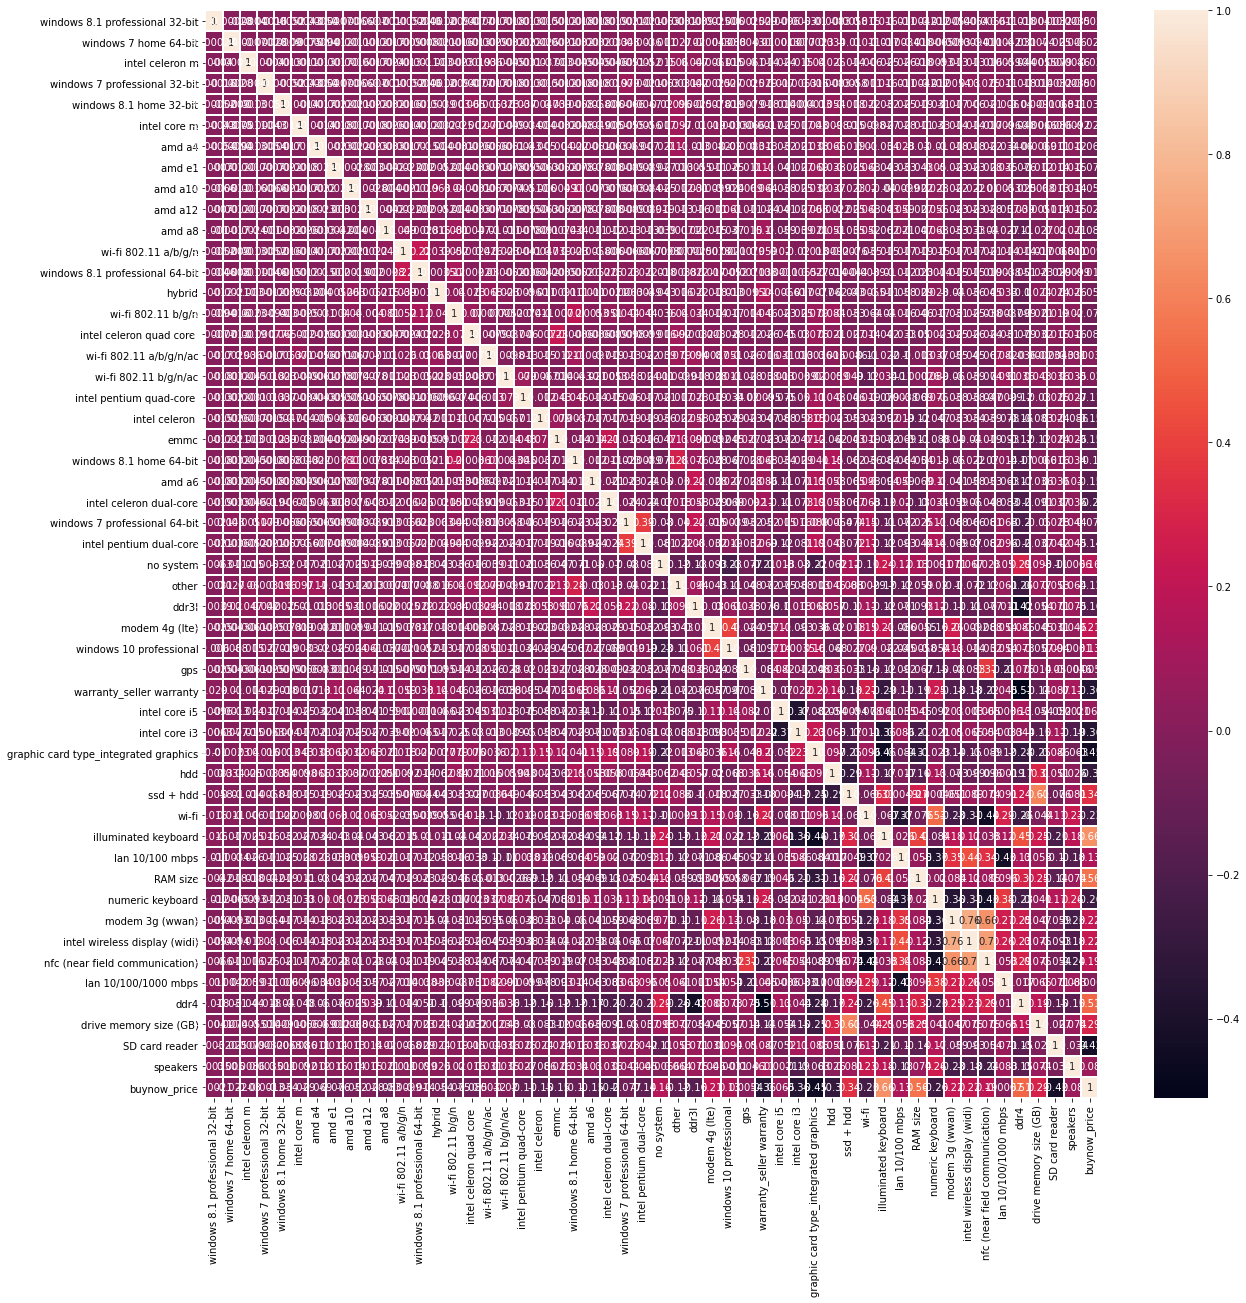

In [73]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

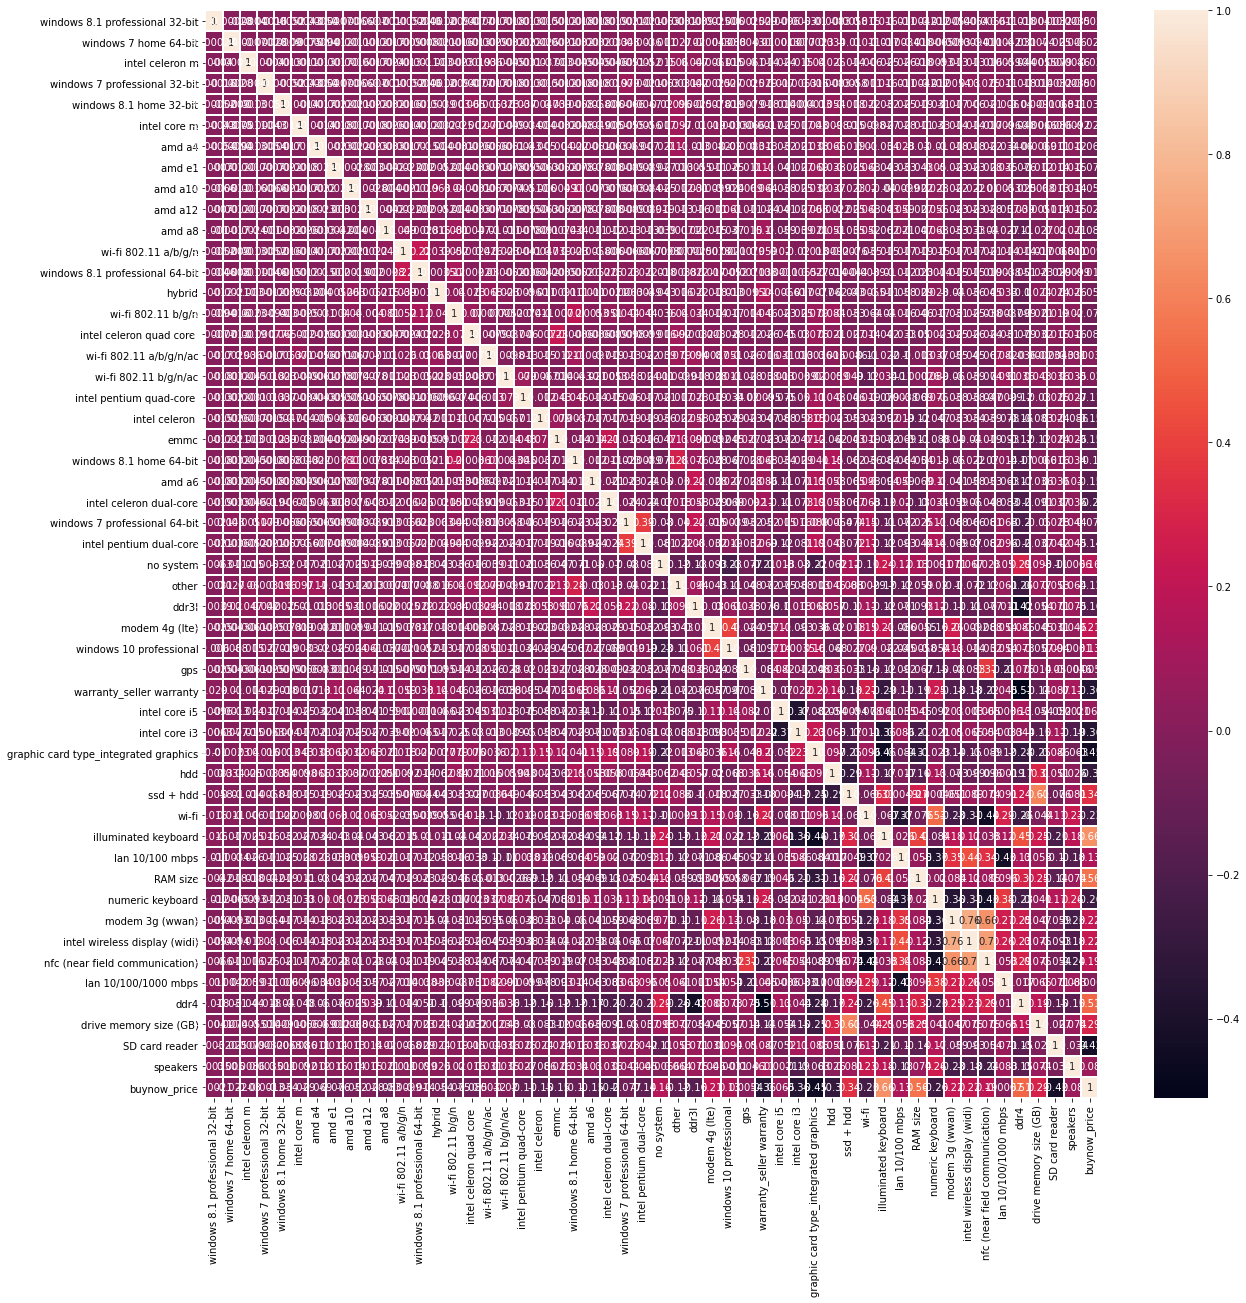

In [77]:
plt.figure(figsize = (20,20))
corr_df = pd.concat([new_df[selected_features],df[label_col]],axis = 1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

In [69]:
new_df[selected_features].shape

(6109, 52)